# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


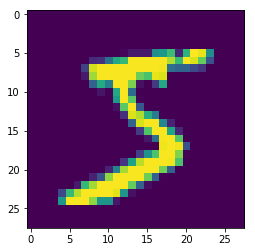

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.15))

# first conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

# first transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
# model.add(Dropout(0.1))

# second conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.15))

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 3)) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0617 10:10:14.344939 140596553627520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0617 10:10:14.361008 140596553627520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 10:10:14.363728 140596553627520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 10:10:14.393840 140596553627520 deprecation_wrapper.py:119] From /usr/local/lib/py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 24)        3480      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`


In [11]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,decay=0.0005)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

W0617 10:11:16.294653 140596553627520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0617 10:11:19.183071 140596553627520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 13s 222us/step - loss: 0.1844 - acc: 0.9425 - val_loss: 0.0446 - val_acc: 0.9856
Epoch 2/40
60000/60000 [==============================] - 11s 186us/step - loss: 0.0682 - acc: 0.9791 - val_loss: 0.0513 - val_acc: 0.9825
Epoch 3/40
60000/60000 [==============================] - 11s 186us/step - loss: 0.0532 - acc: 0.9827 - val_loss: 0.0421 - val_acc: 0.9867
Epoch 4/40
60000/60000 [==============================] - 11s 185us/step - loss: 0.0450 - acc: 0.9854 - val_loss: 0.0299 - val_acc: 0.9906
Epoch 5/40
60000/60000 [==============================] - 11s 185us/step - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0468 - val_acc: 0.9842
Epoch 6/40
60000/60000 [==============================] - 11s 185us/step - loss: 0.0369 - acc: 0.9883 - val_loss: 0.0315 - val_acc: 0.9909
Epoch 7/40
60000/60000 [==============================] - 11s 186us/step - loss: 0.0347 - acc: 0.9888 - val_loss: 0.

In [0]:
 score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.02217904356382642, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[3.50867599e-12 1.03810081e-08 1.46141602e-07 2.43558787e-07
  4.10444508e-12 7.36446657e-13 1.17980208e-17 9.99999642e-01
  4.93512523e-11 2.56910866e-08]
 [3.22760097e-05 3.39745020e-06 9.99963880e-01 1.91226892e-08
  1.53767343e-09 2.65760244e-12 4.47724375e-07 1.43935572e-10
  3.17944213e-08 1.87852555e-12]
 [6.74671519e-09 9.99958873e-01 1.24097669e-05 7.78785321e-08
  7.06019478e-07 7.91018067e-07 1.63459435e-06 2.22320177e-05
  8.48445950e-07 2.37737504e-06]
 [9.99997735e-01 3.34226258e-14 5.56822088e-10 5.88803138e-12
  1.22866206e-09 2.61372923e-09 1.65381152e-06 1.23140101e-11
  1.69286078e-08 6.38230233e-07]
 [2.59565373e-11 9.11583420e-10 3.90304594e-11 6.21781272e-13
  9.99976993e-01 5.88873256e-11 2.16458920e-10 1.20676705e-10
  4.61232208e-09 2.30616661e-05]
 [5.47135137e-08 9.99933362e-01 1.83799712e-05 1.14271987e-08
  1.24480368e-06 1.14825134e-07 1.91568438e-06 4.08500673e-05
  2.06466183e-07 3.93332402e-06]
 [8.67263097e-19 1.89280369e-10 3.32984942e-12 6.14734246e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

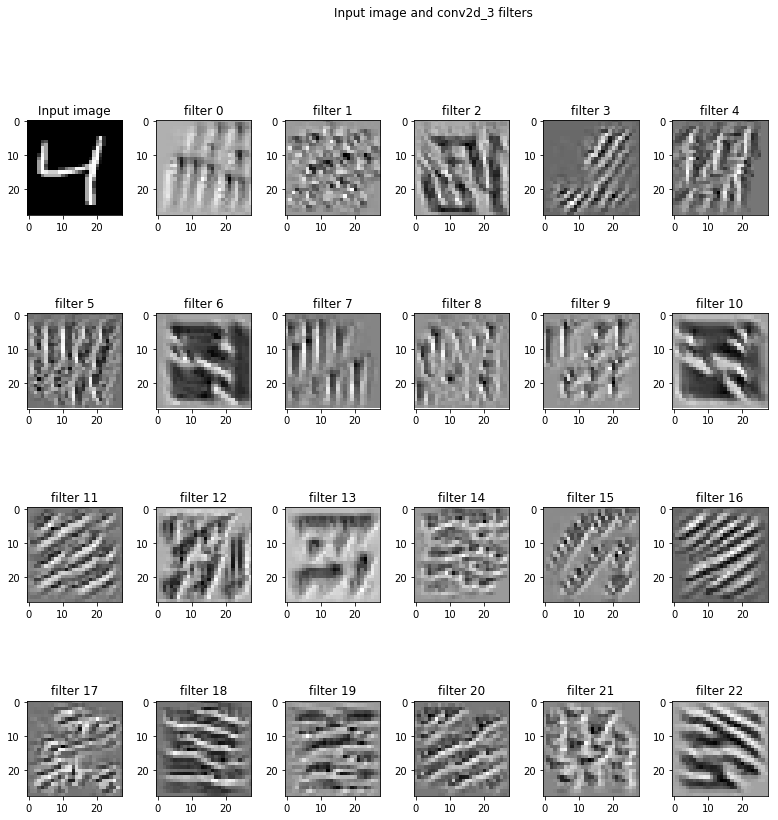

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

**Changes made:**
.

1.   Introduced BatchNormarlization after every 3x3 conv layer.
2.   Changed Learning rate to 0.01 with decay rate at 0.0005.
3.  Introduced dropout of 0.15 after every 3x3 convolution layer, rather than having a concentrated large dropout at less number of places, we are using distributed dropout at every convolution layer.

Results:

After training the model for 40 epochs, I managed to get an accuracy of 99.44% accuracy with 12,750 paramerters. Which meets the requirement.